# Predicting PSA Levels Using Clinical and Demographic Variables

**Objective:** \
To build and evaluate a linear regression model that predicts Prostate-Specific Antigen (PSA) levels in prostate cancer patients based on clinical features such as age, Gleason score, prostate volume, and biopsy results.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load and inspect the data

In [2]:
df = pd.read_csv("/Users/emudr/Desktop/data/prostate_psa_low_vif_clean.csv")

print("\n--- Basic Info ---")
print(df.info())

print("\n--- Summary Statistics ---")
print(df.describe(include="all"))

print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        300 non-null    int64  
 1   gleason                    300 non-null    int64  
 2   prostate_volume            300 non-null    float64
 3   positive_cores             300 non-null    int64  
 4   biopsy_cancer              300 non-null    int64  
 5   family_history             300 non-null    int64  
 6   bmi                        300 non-null    float64
 7   clinical_stage_metastatic  300 non-null    int64  
 8   race_black                 300 non-null    int64  
 9   race_white                 300 non-null    int64  
 10  psa                        300 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 25.9 KB
None

--- Summary Statistics ---
              age     gleason  prostate_volume  positive_cores 

### Exploratory Data Analysis

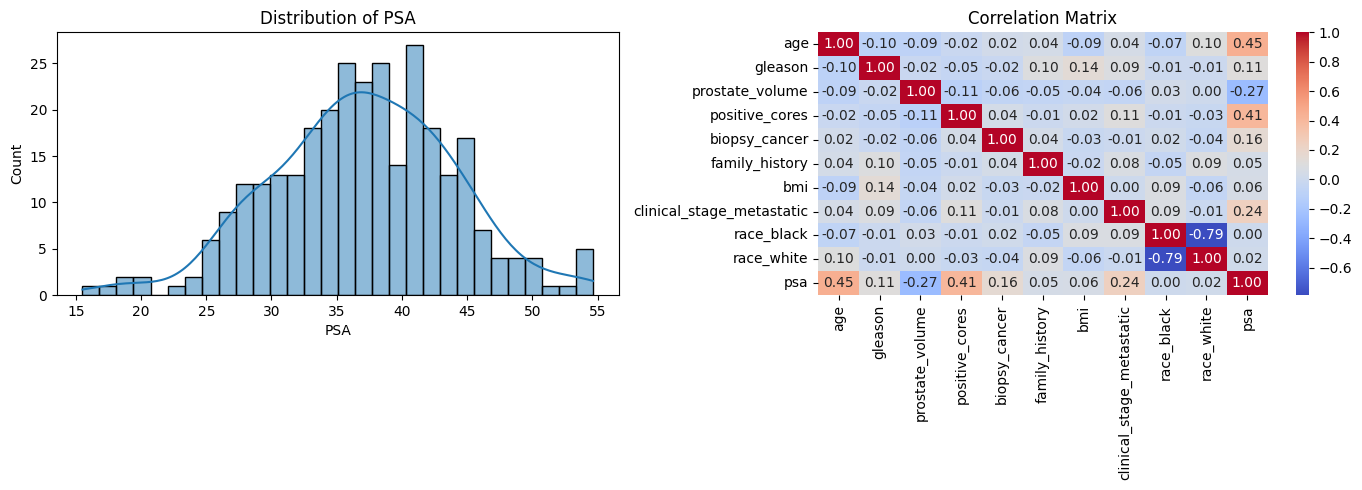

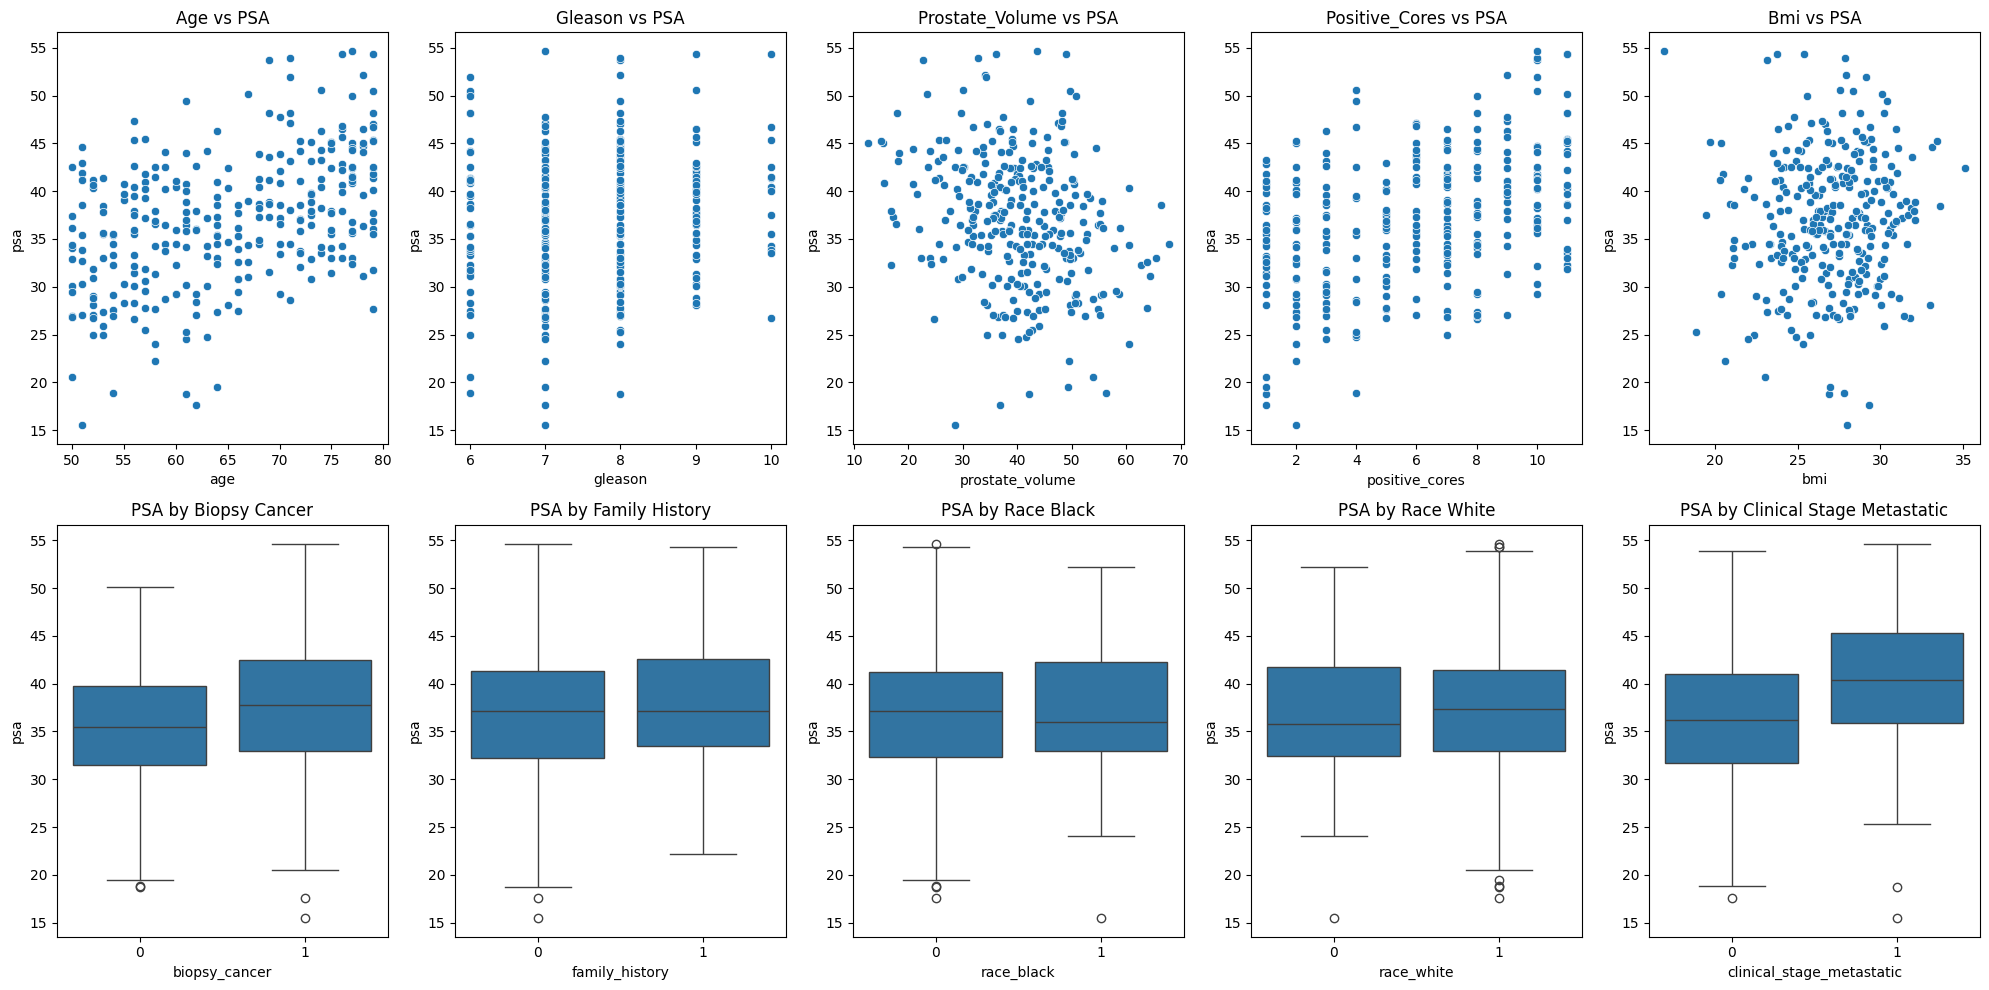

In [3]:
# Figure 1: Distribution of PSA + Correlation heatmap
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df["psa"], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Distribution of PSA")
axes[0].set_xlabel("PSA")

sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlation Matrix")

plt.tight_layout()
plt.show()


# Figure 2: Scatter plots - Numerical predictors vs PSA and Categorical predictors vs PSA

# Numerical columns
numerical_cols = ['age', 'gleason', 'prostate_volume', 'positive_cores', 'bmi']

# Categorical columns
categorical_cols = ['biopsy_cancer', 'family_history', 'race_black', 'race_white', 'clinical_stage_metastatic']

# Create subplots: 2 rows, 5 columns (5 numerical + 5 categorical)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# Plot numerical predictors as scatter plots
for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=col, y="psa", data=df, ax=axes[i])
    axes[i].set_title(f"{col.title()} vs PSA")

# Plot categorical predictors as boxplots
for i, col in enumerate(categorical_cols):
    sns.boxplot(x=col, y="psa", data=df, ax=axes[i + len(numerical_cols)])
    axes[i + len(numerical_cols)].set_title(f"PSA by {col.replace('_', ' ').title()}")

plt.tight_layout()
plt.show()

### Linear Regression Modeling

In [4]:
# Separate predictors and target
X = df[['age', 'gleason', 'prostate_volume', 'positive_cores', 'bmi','biopsy_cancer', 'family_history', 'race_black', 'race_white', 'clinical_stage_metastatic']]
y = df["psa"]

# Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n--- Variance Inflation Factors ---")
print(vif.sort_values(by="VIF", ascending=False))


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression using sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("\n--- Sklearn Model Performance ---")
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

print("\n--- Coefficients ---")
print(pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False))

# Fit OLS model using statsmodels for inference
X_sm = sm.add_constant(X)
ols_model = sm.OLS(y, X_sm).fit()
print("\n--- Statsmodels Summary ---")
print(ols_model.summary())


--- Variance Inflation Factors ---
                     feature        VIF
4                        bmi  59.697345
1                    gleason  45.091675
0                        age  35.944962
2            prostate_volume  14.738094
8                 race_white   8.792860
3             positive_cores   4.350101
5              biopsy_cancer   3.626913
7                 race_black   3.366747
6             family_history   1.366860
9  clinical_stage_metastatic   1.313809

--- Sklearn Model Performance ---
R²: 0.46
MSE: 26.51

--- Coefficients ---
clinical_stage_metastatic    2.258333
biopsy_cancer                2.024530
gleason                      1.055056
positive_cores               0.878340
race_black                   0.553107
race_white                   0.360193
age                          0.341686
family_history               0.285431
bmi                          0.250360
prostate_volume             -0.095602
dtype: float64

--- Statsmodels Summary ---
                       

### Resiudal plot 

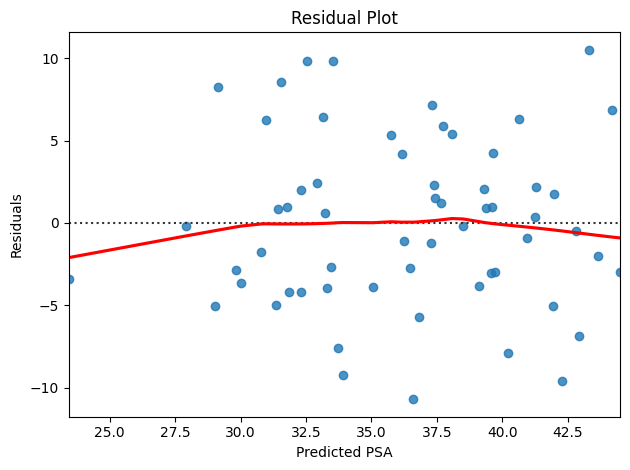

In [5]:
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel("Predicted PSA")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

# PSA Prediction Model - Interpretation and Diagnostics

This analysis models **PSA levels** as a function of clinical and demographic variables using multiple linear regression. Key diagnostics include model performance, multicollinearity check, and coefficient interpretation.


## 🔍 Model Objective

To predict **PSA (prostate-specific antigen)** levels using clinical and demographic predictors including age, Gleason score, prostate volume, biopsy results, and race.


## 📈 Model Performance

| Metric               | Value |
|----------------------|-------|
| R² (Scikit-learn)    | 0.46  |
| R² (Statsmodels)     | 0.49  |
| Adjusted R²          | 0.47  |
| Mean Squared Error   | 26.51 |
| F-statistic (p < .001)| ✅    |

- The model explains approximately **47–49%** of the variance in PSA levels.
- Model is statistically significant (`p < 0.001` for F-statistic), indicating that at least one predictor is associated with PSA.


## 🧠 Coefficient Summary (Statsmodels)

| Feature                    | Coef | p-value | Significance |
|----------------------------|------|---------|--------------|
| Clinical Stage (Metastatic) | +2.64 | 0.000   | ✅ Significant |
| Biopsy Cancer               | +1.99 | 0.003   | ✅ Significant |
| Gleason Score               | +1.02 | 0.000   | ✅ Significant |
| Positive Cores             | +0.85 | 0.000   | ✅ Significant |
| Age                        | +0.34 | 0.000   | ✅ Significant |
| Prostate Volume            | −0.11 | 0.000   | ✅ Significant |
| BMI                        | +0.14 | 0.172   | ❌ Not significant |
| Race (Black)               | +1.09 | 0.355   | ❌ Not significant |
| Race (White)               | +0.72 | 0.489   | ❌ Not significant |
| Family History             | −0.15 | 0.821   | ❌ Not significant |

🔎 **Interpretation**:
- Higher **Gleason score**, **clinical stage**, **positive cores**, **age**, and **presence of cancer on biopsy** are associated with higher PSA.
- **Larger prostate volume** is **negatively** associated with PSA.
- Race and family history were **not statistically significant** in this model.


## 🧪 Multicollinearity (VIF)

| Feature                | VIF   |
|------------------------|-------|
| BMI                    | 59.70 |
| Gleason                | 45.09 |
| Age                    | 35.94 |
| Prostate Volume        | 14.74 |
| Race (White)           | 8.79  |
| Positive Cores         | 4.35  |
| Biopsy Cancer          | 3.63  |
| Race (Black)           | 3.37  |
| Family History         | 1.37  |
| Clinical Stage         | 1.31  |

🚨 **Interpretation**:
- **High VIF values** (>10), especially for BMI, Gleason, and Age, indicate **strong multicollinearity**, which can inflate standard errors and distort coefficient estimates.
- Consider removing or combining highly correlated variables or applying regularization techniques (e.g., Ridge, Lasso).


## ⚠️ Notes & Limitations

- **Condition number** ≈ 1270 suggests potential multicollinearity or numerical instability.
- Model assumes linearity, normality of errors, and homoscedasticity.
- External validation and feature selection are advised before clinical use.


## 📌 Summary

- The model successfully identifies significant clinical predictors of PSA.
- However, **multicollinearity is a concern**, especially for BMI, Gleason, and Age.
- Future work should address correlated variables and consider dimensionality reduction or regularization.


## Building Model including only features with VIF < 5 

In [8]:
# Separate predictors and target
X = df[['prostate_volume', 'positive_cores','biopsy_cancer', 'family_history', 'race_black', 'clinical_stage_metastatic']]
y = df["psa"]

# Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n--- Variance Inflation Factors ---")
print(vif.sort_values(by="VIF", ascending=False))


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression using sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("\n--- Sklearn Model Performance ---")
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

print("\n--- Coefficients ---")
print(pd.Series(lr.coef_, index=X.columns).sort_values(ascending=False))

# Fit OLS model using statsmodels for inference
X_sm = sm.add_constant(X)
ols_model = sm.OLS(y, X_sm).fit()
print("\n--- Statsmodels Summary ---")
print(ols_model.summary())


--- Variance Inflation Factors ---
                     feature       VIF
0            prostate_volume  4.801467
1             positive_cores  3.650782
2              biopsy_cancer  3.235302
3             family_history  1.316630
5  clinical_stage_metastatic  1.281155
4                 race_black  1.274645

--- Sklearn Model Performance ---
R²: 0.24
MSE: 37.06

--- Coefficients ---
clinical_stage_metastatic    3.253620
biopsy_cancer                2.144592
positive_cores               0.799786
family_history               0.332616
prostate_volume             -0.127474
race_black                  -0.816188
dtype: float64

--- Statsmodels Summary ---
                            OLS Regression Results                            
Dep. Variable:                    psa   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     18.49
Date:                Wed, 

# PSA Prediction Model (Reduced Multicollinearity)

This model predicts **PSA (prostate-specific antigen)** levels using a subset of clinical and demographic features that exhibit **low multicollinearity** (VIF < 5). The goal was to improve model interpretability and statistical validity by excluding highly collinear variables.


## 🔍 Model Objective

To assess which clinical and demographic variables are predictive of PSA levels using multiple linear regression, while ensuring low multicollinearity between predictors.


## 📈 Model Performance

| Metric               | Value |
|----------------------|-------|
| R² (Scikit-learn)    | 0.24  |
| R² (Statsmodels)     | 0.28  |
| Adjusted R²          | 0.26  |
| Mean Squared Error   | 37.06 |
| F-statistic (p < .001)| ✅    |

- The model explains about **26–28%** of the variance in PSA levels.
- Statistically significant overall (`p < 0.001` for F-statistic).
- Model fit is lower than the full model due to reduced variable count, but with improved multicollinearity diagnostics.


## 🧠 Coefficient Summary (Statsmodels)

| Feature                    | Coef | p-value | Significance |
|----------------------------|------|---------|--------------|
| Clinical Stage (Metastatic)| +3.30 | 0.000   | ✅ Significant |
| Biopsy Cancer              | +2.04 | 0.009   | ✅ Significant |
| Positive Cores             | +0.79 | 0.000   | ✅ Significant |
| Prostate Volume            | −0.14 | 0.000   | ✅ Significant |
| Family History             | +0.28 | 0.731   | ❌ Not significant |
| Race (Black)               | −0.07 | 0.934   | ❌ Not significant |

🔎 **Interpretation**:
- **Metastatic clinical stage**, **positive biopsy**, **higher number of positive cores**, and **smaller prostate volume** are all significant predictors of elevated PSA.
- **Family history** and **race (Black)** were not significant in this reduced model.


## 🧪 Multicollinearity (VIF < 5)

| Feature                | VIF   |
|------------------------|-------|
| Prostate Volume        | 4.80  |
| Positive Cores         | 3.65  |
| Biopsy Cancer          | 3.24  |
| Family History         | 1.32  |
| Clinical Stage         | 1.28  |
| Race (Black)           | 1.27  |

✅ **Interpretation**:
- All features have **VIF < 5**, indicating **no problematic multicollinearity**.
- This improves the reliability of coefficient estimates and standard errors.


## ⚠️ Notes & Limitations

- Model fit (R² = 0.24–0.28) is moderate; additional predictors may be needed for stronger clinical accuracy.
- The **condition number (215)** is acceptable, suggesting no severe multicollinearity or instability.
- Further validation (e.g., cross-validation, test set) is recommended.
- Consider alternative modeling strategies (e.g., regularized regression, tree-based models) for improved prediction.


## 📌 Summary

- A simpler model with **six predictors and low multicollinearity**.
- Retains several clinically meaningful predictors of PSA.
- **Trade-off**: Lower explanatory power in exchange for **better statistical interpretability**.